# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
from sklearn.preprocessing import LabelEncoder
assert sklearn.__version__ >= "0.20"

import os

import pandas as pd

from uszipcode import SearchEngine
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='white', palette='tab10', font='sans-serif', font_scale=0.9, color_codes=False, rc=None)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "wids_datathon"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Import the Data

In [2]:
def load_medical_data(medical_path=""):
    csv_path = os.path.join(medical_path, "training.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

Let's see the shape of the data and the name of the columns 

In [3]:
medical = load_medical_data()
medical.shape

(12906, 83)

In [4]:
medical.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [5]:
medical = load_medical_data()
medical.head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

There are a lot of missing values... Few features are available for all entries (12906 examples non-null).

In [7]:
medical.isna().sum() 

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

# Discover and Visualize the Data to Gain Insights

Because the column patient_state has all the values Female we should drop the column, it's irrelevant. 

In [8]:
medical["patient_gender"].value_counts()

patient_gender
F    12906
Name: count, dtype: int64

Let's watch the patient's state 

In [9]:
medical["patient_state"].value_counts()

patient_state
CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: count, dtype: int64

# Visualising the correlations

I want to look for the correlation between the features, but first we will transform them in number values 

In [10]:
medical2 = load_medical_data()

numeric_cols = medical2.select_dtypes(include=['int', 'float']).columns
categorical_cols = medical2.select_dtypes(include=['object', 'string']).columns

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    medical2[col] = label_encoders[col].fit_transform(medical2[col])

Let's make a matrix of correlation between the features and print the correlation with y (the column DiagPeriodL90D). It looks like breast_cancer_diagnosis_code, breast_cancer_diagnosis_desc, payer_type have a good correlation with DiagPeriodL90D.

In [11]:
correlation_matrix = medical2.corr()

sorted_correlation_matrix = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

correlations_with_DiagPeriodL90D = correlation_matrix['DiagPeriodL90D'].sort_values(ascending=False)

sorted_correlations_with_DiagPeriodL90D = correlations_with_DiagPeriodL90D.drop_duplicates()
sorted_correlations_with_DiagPeriodL90D

DiagPeriodL90D                      1.000000
breast_cancer_diagnosis_code        0.498536
breast_cancer_diagnosis_desc        0.076746
payer_type                          0.071495
patient_age                         0.055634
                                      ...   
widowed                            -0.031544
patient_state                      -0.034108
education_less_highschool          -0.035954
metastatic_cancer_diagnosis_code   -0.090909
patient_gender                           NaN
Name: DiagPeriodL90D, Length: 83, dtype: float64

Let's print the all the matrix to show all the correlation. We can confirm that breast_cancer_diagnosis_code, breast_cancer_diagnosis_desc and metastatic_cancer_diagnosis_code have a good correlation with DiagPeriodL90D.

Saving figure Correlation Heatmap


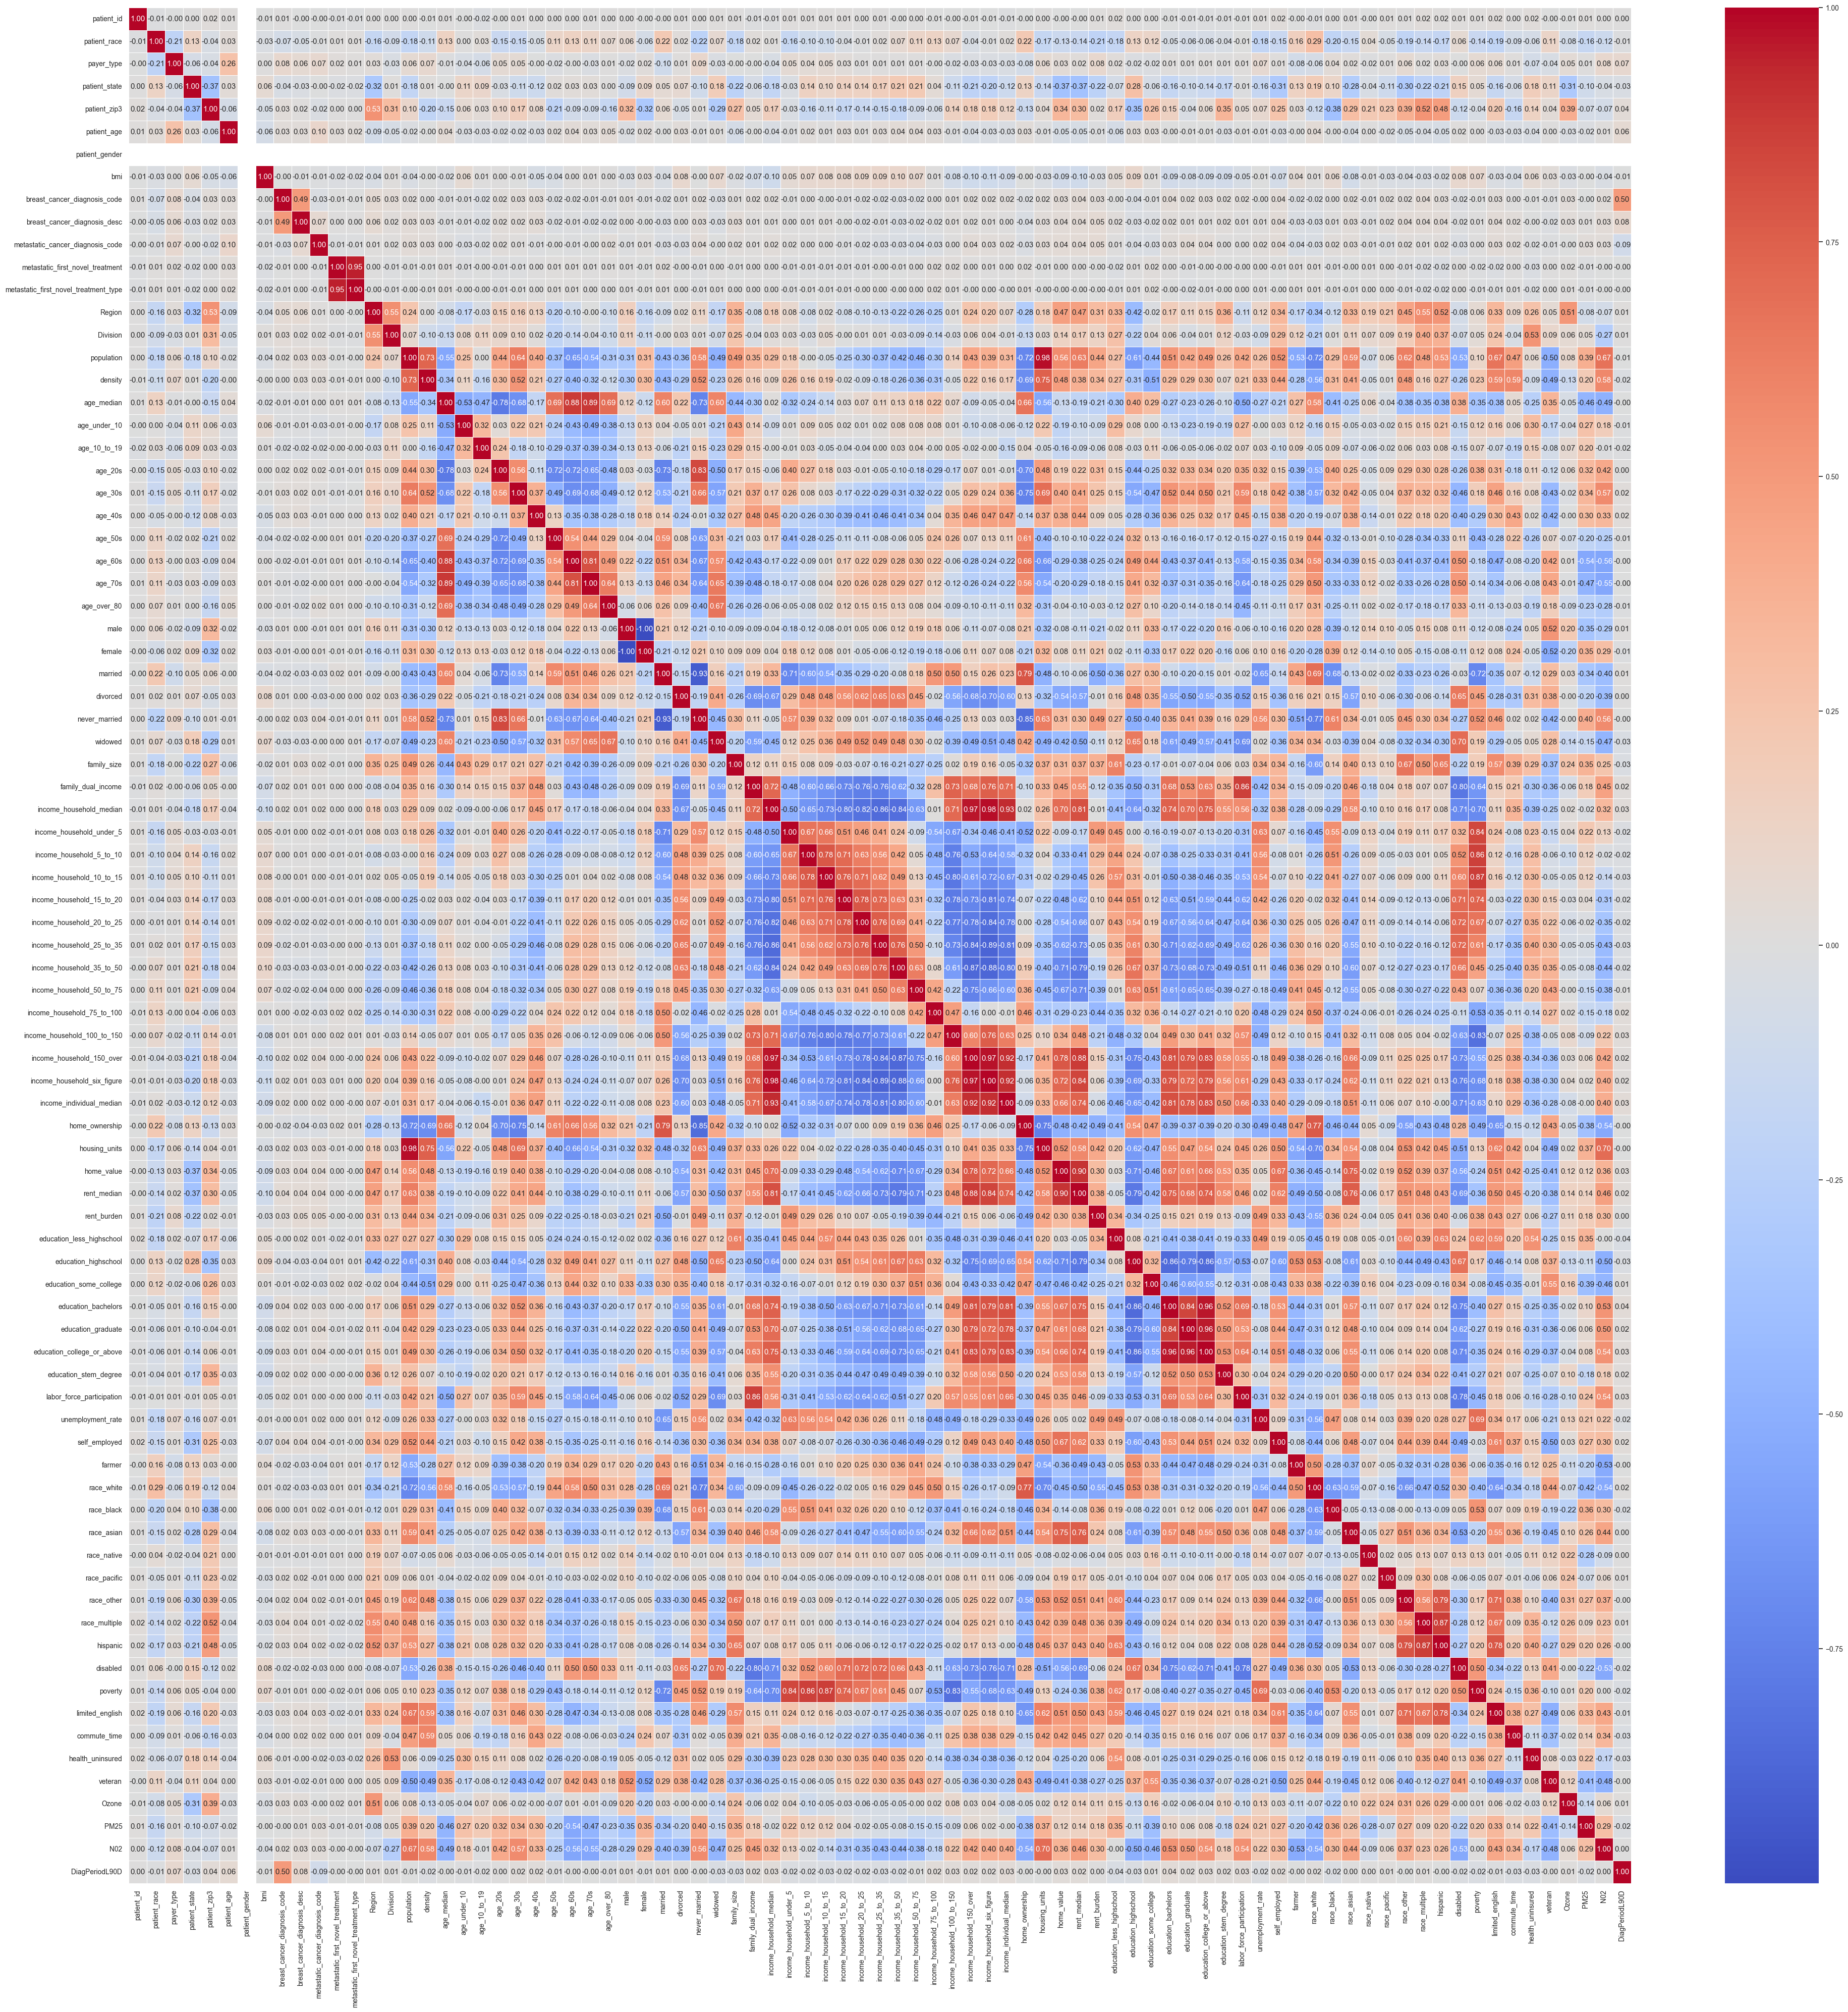

In [12]:
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
save_fig("Correlation Heatmap")
plt.show()

Let's make more pairplots between the DiagPeriodL90D,breast_cancer_diagnosis_code, payer_type, patient_age, education_bachelors to see if we can visually see some correlation.
It doesn't look like it's some correlation. 

Saving figure Pairplot


<Figure size 10000x10000 with 0 Axes>

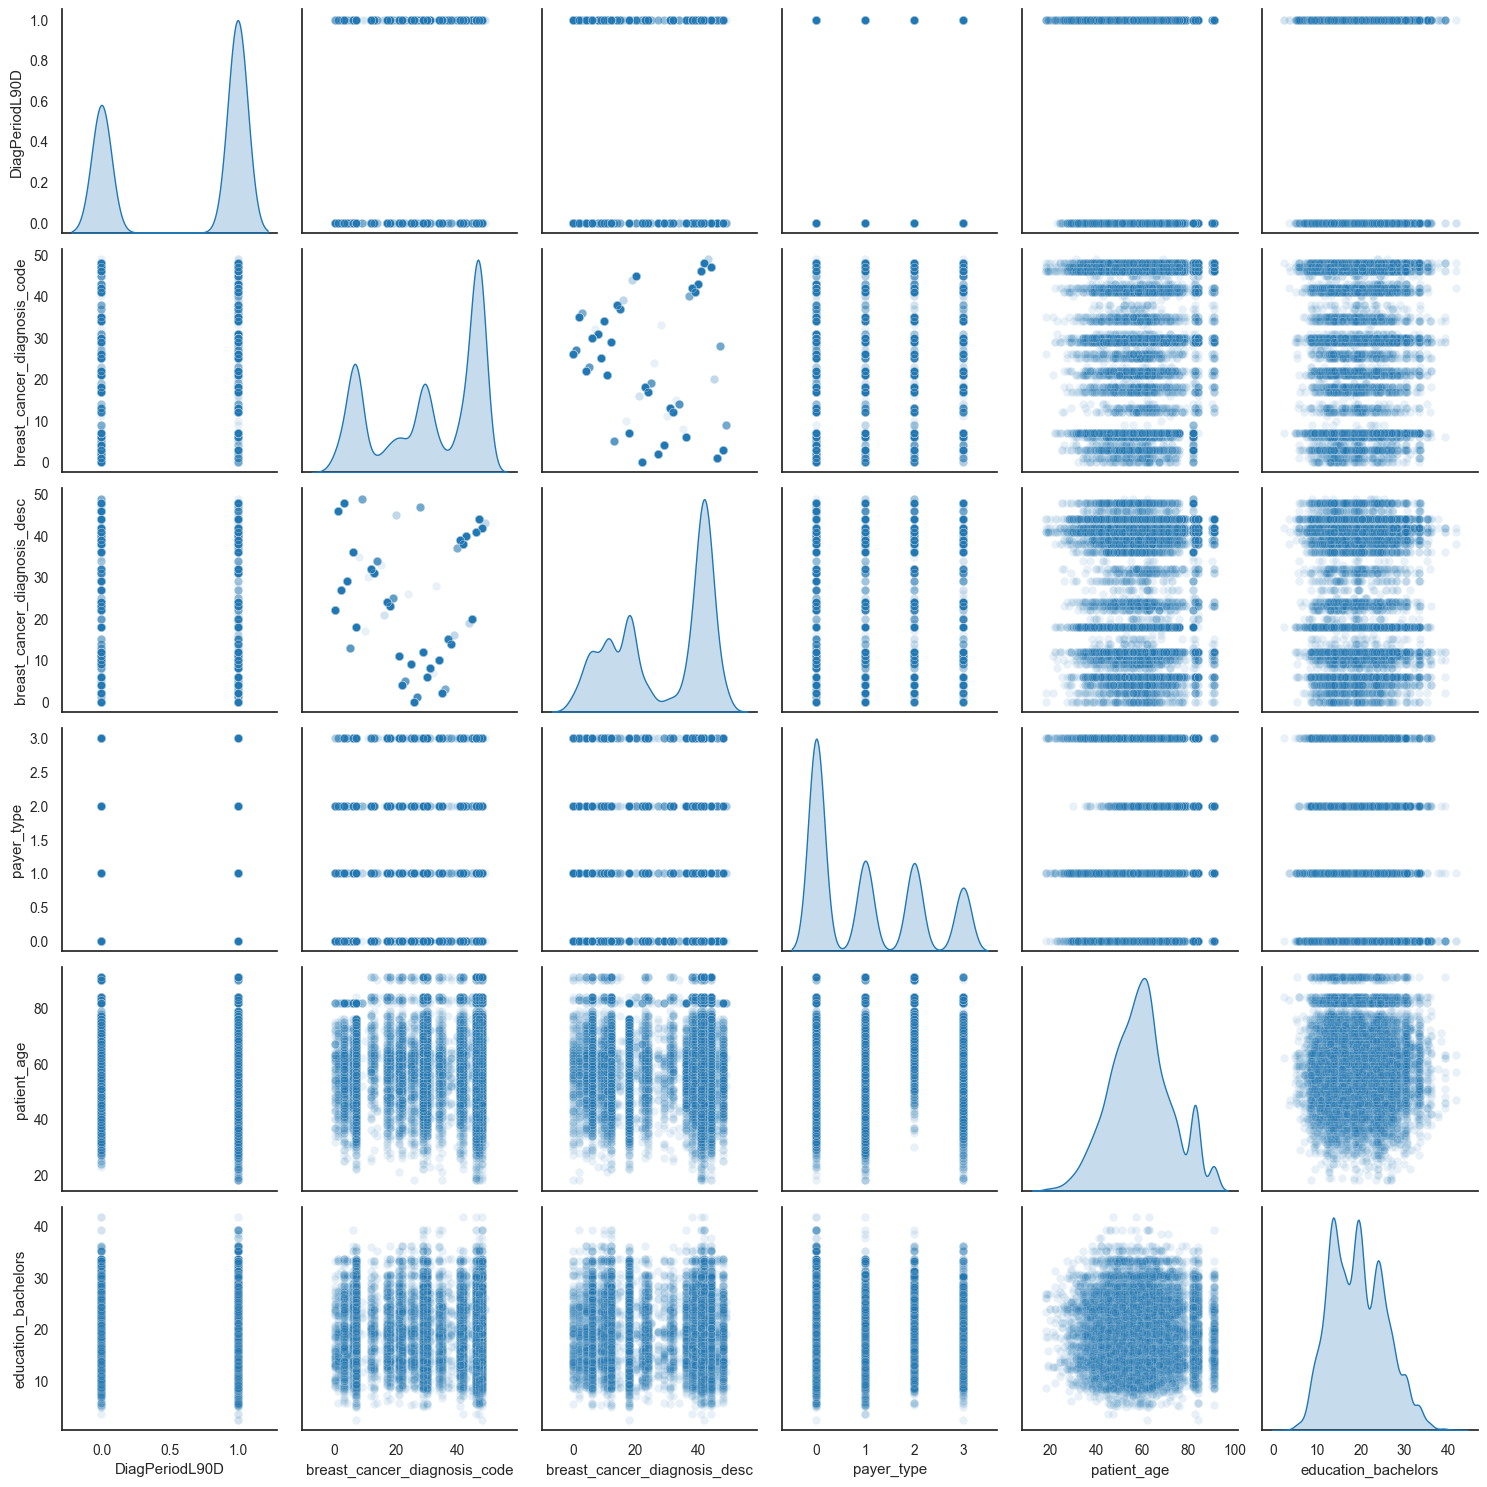

In [13]:
plt.figure(figsize=(100,100))
pairplot = sns.pairplot(medical2[["DiagPeriodL90D", "breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc", "payer_type", "patient_age", "education_bachelors"]], diag_kind='kde', plot_kws={'alpha':0.1})
save_fig("Pairplot")
pairplot

Let's view if patient's race with the bigger bmi have potential to be diagnosed in 90 days.


First let's view (calculate) the bmi for every race

In [14]:
medical.fillna({col: "patient_race"}, inplace=True)
medical.groupby("patient_race")["bmi"].mean()

patient_race
Asian       26.048571
Black       30.707333
Hispanic    30.082155
Other       28.477040
White       28.811565
Name: bmi, dtype: float64

Then let's view the bmi for every race on a scatter plot. It looks like all races are the same.

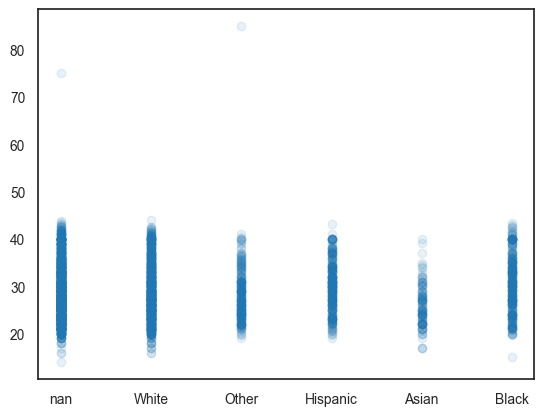

In [15]:
medical["patient_race"] = medical["patient_race"].astype(str)
plt.scatter(medical["patient_race"].tolist(), medical["bmi"].tolist(), alpha=0.1)

Now let's view if bmi for every race on a scatter plot has an impact for the potential to be diagnosed in 90 days. 
Black people with big bmi(over 45) were diagnosed after 90 days.
Black people with big bmi( in the range 40-45) were diagnosed after 90 days.
Black people with small bmi( in the range 10-20) were diagnosed before 90 days.
Asian people with big bmi(over 40) were diagnosed before 90 days.
People with big bmi(over 40) were diagnosed after 90 days.

Saving figure Scatter_RACE-BMI


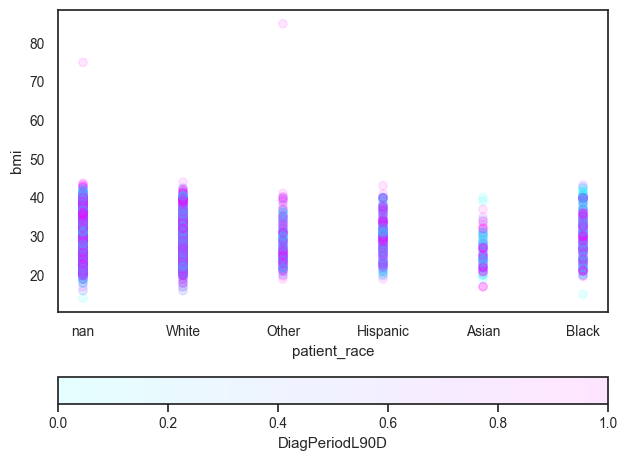

In [16]:
plt.scatter(medical["patient_race"].tolist(), medical["bmi"].tolist(), c=medical['DiagPeriodL90D'].tolist(), cmap=mpl.colormaps["cool"], alpha=0.1)
plt.xlabel('patient_race')
plt.ylabel('bmi')
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.set_xlabel('DiagPeriodL90D')
save_fig("Scatter_RACE-BMI")

Let's see if breast_cancer_diagnosis_code(s) have potential to be diagnosed in 90 days. (I think a correlation should exist). There are some code like C50, C509, C5021 which are diagnosed after 90 days and some like C50421, C5001, 1759 which are diagnosed before 90 days.

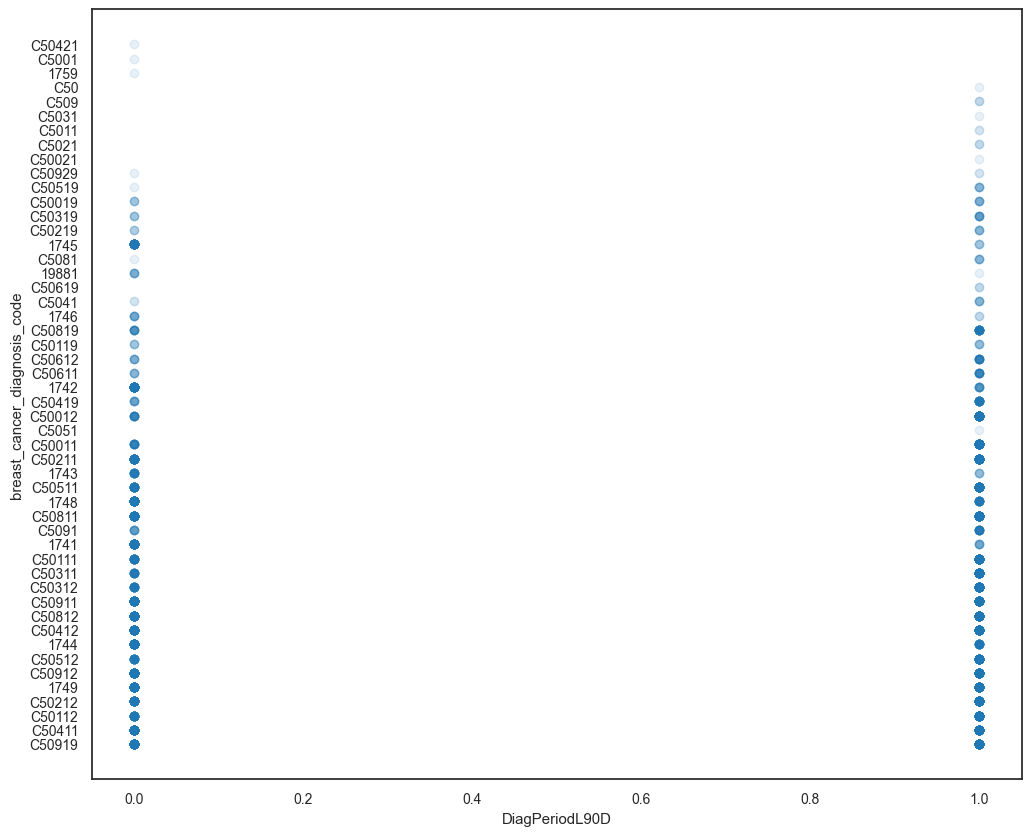

Saving figure breast_cancer_diagnosis_code_scatterPlot


<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12,10))
plt.scatter(medical["DiagPeriodL90D"].tolist(), medical["breast_cancer_diagnosis_code"].tolist(), alpha=0.1)
plt.xlabel('DiagPeriodL90D')
plt.xticks(fontsize=10)
plt.ylabel('breast_cancer_diagnosis_code')
plt.yticks(fontsize=10)
plt.show()
save_fig("breast_cancer_diagnosis_code_scatterPlot")

# Data Cleaning 

As I said before, as patient_gender has just a value and it's irrelevant.  

In [18]:
medical.drop(columns= ["patient_gender"])
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           12906 non-null  object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

Let's fill in the patient states with the information obtained from the zip3 code. We will also check for any inconsistencies between the state and zip3. 

In [19]:
sr = SearchEngine()
repaired_states = 0
state_inconsistencies = 0
incorrect_zip3s = 0
for ind in medical.index:
    # try:
    if medical.isnull().loc[ind,"patient_state"]:
        medical.loc[ind, "patient_state"] = sr.by_prefix(medical["patient_zip3"][ind])[0].state
        repaired_states += 1
    elif len(sr.by_prefix(medical["patient_zip3"][ind])) == 0:
        incorrect_zip3s += 1
    elif medical["patient_state"][ind] != sr.by_prefix(medical["patient_zip3"][ind])[0].state:
        medical.loc[ind, "patient_state"] = sr.by_prefix(medical["patient_zip3"][ind])[0].state
        state_inconsistencies += 1
    # except Exception as err:
    #     print(f"Unexpected {err=}, {type(err)=}")
    #     print(f"Patient zip3:{medi}")
print(f"Repaired States: {repaired_states}")
print(f"State inconsistencies: {state_inconsistencies}")
print(f"Incorrect zip3s (for inconsistency check): {incorrect_zip3s}")
print(medical["patient_state"])

Repaired States: 51
State inconsistencies: 166
Incorrect zip3s (for inconsistency check): 1
0        CA
1        CA
2        TX
3        CA
4        ID
         ..
12901    OH
12902    CA
12903    CA
12904    NY
12905    FL
Name: patient_state, Length: 12906, dtype: object
